In [246]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, transform, feature, color, draw, exposure, filters, segmentation
import glob

In [247]:
SIZE = (256, 256)
depth_maps = [transform.resize(io.imread(img), SIZE) for img in glob.glob('./depth/*.bmp')]

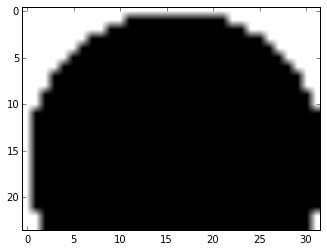

In [248]:
r = 12
template = np.ones((32, 32), dtype=np.float32)
rr, cc = draw.circle(template.shape[0]/2, template.shape[1]/2, 16)
template[rr, cc] = 0
template = template[:24]
plt.gray()
plt.imshow(template)

/Users/sheema/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


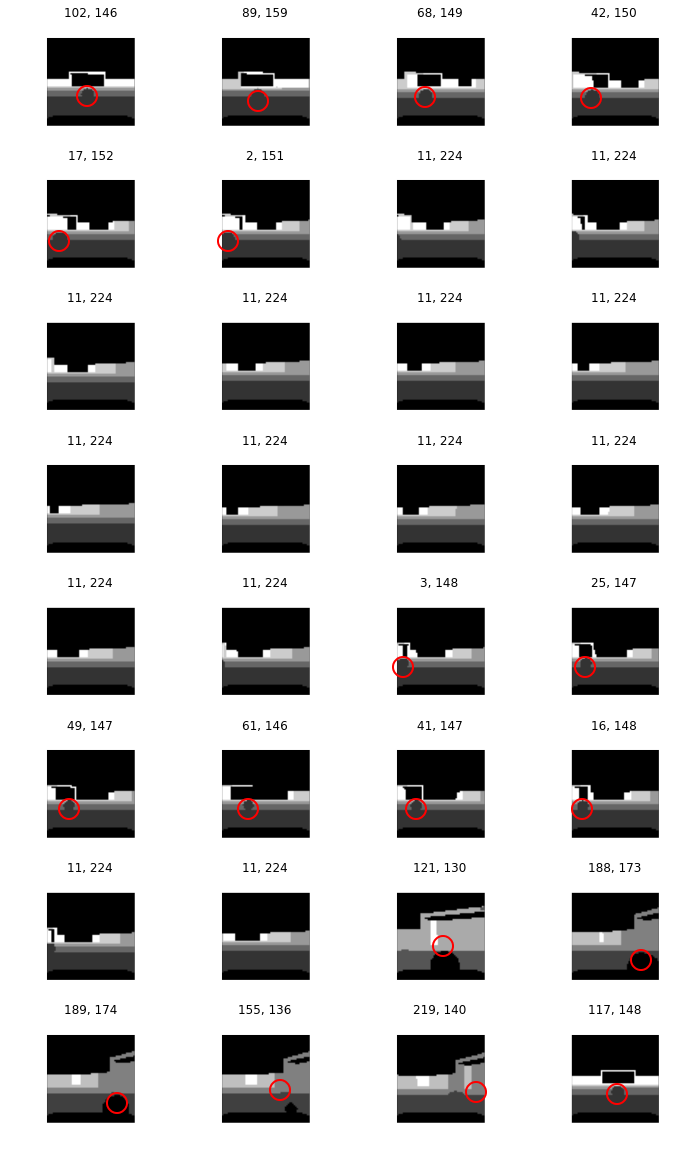

In [249]:
plt.figure(num=None, figsize=(12, 20))
col = 4
for i,m in enumerate(depth_maps):
    res = feature.match_template(m, template)
    ij = np.unravel_index(np.argmax(res), res.shape)
    x, y = ij[::-1]
    plt.subplot(len(depth_maps)/col, col, i)
    plt.axis('off')
    plt.grid('off')
    plt.title(str(x)+', '+str(y))
    plt.imshow(m)
    if y < m.shape[0]/4*3:
        plt.plot(x+template.shape[1]/2, y+template.shape[0], 'o', markeredgecolor='r', markerfacecolor='none', markersize=20, markeredgewidth=2)
    else:
         plt.plot(x+template.shape[1]/2, y+template.shape[0], 'o', markeredgecolor='r', markerfacecolor='none', markersize=0)